## 8. pn Junction Diode: Transient Response
### 8.1 Turn-off transient
### 8.1.1 Introduction
### 8.1.2 Qualitative Analysis
$$\left. \frac{d\Delta P_n}{dx}\right|_{x=x_n}=(slope\ of\ \Delta P_n(x)\ or\ P_n(x)\ versus\ x\ plot\ at\ x=x_n)=-\frac{1}{qAD_p} $$


### 8.1.3 The Storage Delay Time
#### Quantitative Analysis
p+n step junction diode. the electron charge stored on the p-side is negligible compared to the hole charge $(Q_p)$ stored on th n-side\
$i=i_{Diff}$ in an ideal diode, referring to Eq 6.56 pp 283.
$$\frac{dQ_p}{dt}=i-\frac{Q_p}{\tau_p}$$
$i=-I_R=constant$ for times $0^+ \ll t \ll t_s$
$$\frac{dQ_p}{dt}=-\left(I_R+\frac{Q_p}{\tau_p}\right)\quad ... \quad 0^+ \ll t \ll t_s$$
$Q_p(t_s)$, in stored charge remaining at $t=t_s$
$$t_s=\tau_p ln\left(1+\frac{I_F}{I_R}\right) $$
$$erf\left(\sqrt{\frac{t_s}{\tau_p}}\right)=\frac{1}{1+\frac{I_F}{I_R}} $$

#### Measurement

### 8.1.4 General Information

### 8.2 Turn-on transient
$$\frac{dQ_p}{dt}=I_F-\frac{Q_p}{\tau_p}$$
$$\left.t=-\tau_p ln\left(I_F-\frac{Q_p}{\tau_p}\right)\right|_0^{Q_p(t)} = -\tau_p ln \left[1-\frac{Q_p(t)}{I_F\tau_p} \right]$$
$$Q_p(t)=I_F\tau_p(1-e^{-t/\tau_p}) $$
Under steady state conditions the stored hole charge in an ideal diode is, $t=\infty$
$$Q_p=I_{Diff}\tau_p=I_0\tau_p(e^{qV_A/kT}-1) $$
As a first order approximation, $Q_p(t)$ during the turn-on transient $V_A \rightarrow v_A$
$$Q_p(t)=I_0\tau_p(e^{qv_A(t)/kT}-1) $$
$$v_A(t)=\frac{kT}{q} ln\left[1+\frac{I_F}{I_0}(1-e^{-t/\tau_p}) \right]$$

Figure 8.3 Decay of the stored hole charge inside a p+n diode as a function of time for 0<t<_ts\
Figure 8.8 Build up of the stored hole charge inside a p+n diode during the turn-on transient\
distribution - error function using from scipy.special import erfinv, erf\
Turn-off, Turn-on Concentration plot generator\
Turn-off, Iratio=IR/IF, TS=ts/taup, TS=(erfinv(1/(1+Iratio)))**2\
X=x'/LP=(x-xn)/LP, T=t/taup\
steady state curve, y0=exp(-X), x-axis X=x'/LP, y-axis y0, Delta_pn(x',t)/Delta_pnmax\
Time-dependent plots yon=(A-B)/2, yoff-exp(-x)-(1+Iratio)*yon

TS=0.23


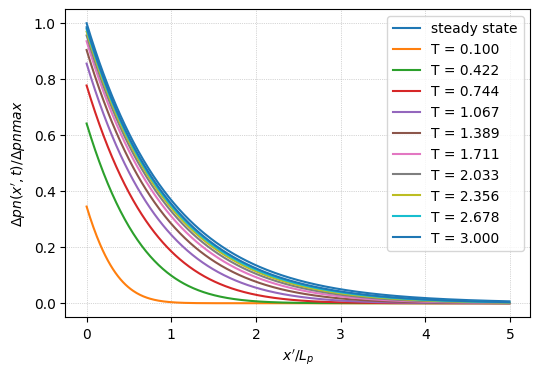

In [12]:
# Exercise 8.2
import numpy as np, matplotlib.pyplot as plt
from scipy.special import erfinv, erf

Iratio=1 #Iratio=IR/IF, TS=ts/taup for turn-off
TS=(erfinv(1/(1+Iratio)))**2
print(f"TS={TS:.2f}")

X=np.arange(0,5,0.01) #X=x'/Lp, T=t/taup
T=np.linspace(0.1,3,10)
#T=np.array([0.1,1,2,3])
y0=np.exp(-X) #Plot steady-state curve

plt.figure(figsize=(6, 4))
plt.plot(X,y0,label="steady state")
for i in range(len(T)):
    A=np.exp(-X)*(1-erf(X/(2*np.sqrt(T[i]))-np.sqrt(T[i])))
    B=np.exp(X)*(1-erf(X/(2*np.sqrt(T[i]))+np.sqrt(T[i])))
    yon=(A-B)/2 #yon=Dpn(x',t)/Dpnmax during turn-on
    yoff=np.exp(-X)-(1+Iratio)*yon #yoff=Dpn(x',t)/Dpnmax during turn-off
    plt.plot(X,yon,label=f'T = {T[i]:.3f}')
    #plt.plot(X,yoff,label=f'T = {T[i]:.3f}')
    
plt.xlabel(r"$x'/L_p$"), plt.ylabel(r"$\Delta pn(x',t)/\Delta pnmax$")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

TS=0.23


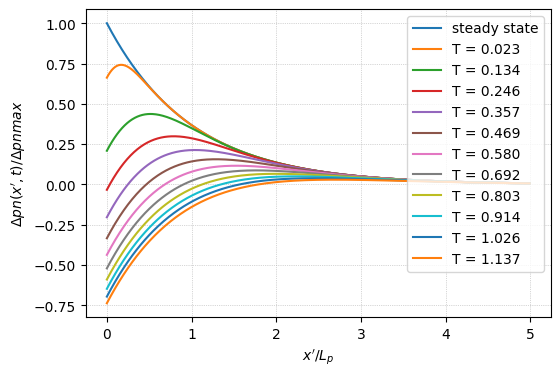

In [60]:
# Exercise 8.2
import numpy as np, matplotlib.pyplot as plt
from scipy.special import erfinv, erf

Iratio=1
TS=(erfinv(1/(1+Iratio)))**2
print(f"TS={TS:.2f}")

X=np.arange(0,5,0.01)
T=np.linspace(TS/10,5*TS,11)
y0=np.exp(-X)

plt.figure(figsize=(6, 4))
plt.plot(X,y0,label="steady state")
for i in range(len(T)):
    A=np.exp(-X)*(1-erf(X/(2*np.sqrt(T[i]))-np.sqrt(T[i])))
    B=np.exp(X)*(1-erf(X/(2*np.sqrt(T[i]))+np.sqrt(T[i])))
    yon=(A-B)/2
    yoff=np.exp(-X)-(1+Iratio)*yon
    #plt.plot(X,yon,label=f'T = {T[i]:.3f}')
    plt.plot(X,yoff,label=f'T = {T[i]:.3f}')
    
plt.xlabel(r"$x'/L_p$"), plt.ylabel(r"$\Delta pn(x',t)/\Delta pnmax$")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend(loc=1)
plt.show()

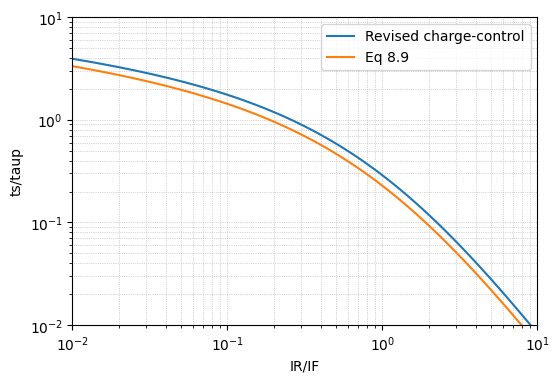

In [11]:
# Problem 8.3 Comparison of the ts/taup versus IR/IF computed
# Equation 8.6 page 333 Revised charge-control ts
# Equation 8.9 page 334 ts=erf(sqrt(ts/taup))=1/(1+IR/IF)
import numpy as np, matplotlib.pyplot as plt
from scipy.special import erfinv, erf

Iratio=np.logspace(-2,1,101) # Iratio=IF/IF
x=1/Iratio
ts1=np.log((1+x)**2/(1+2*x)) #page 345
ts2=erfinv(1/(1+Iratio))**2 #Eq 8.9

plt.figure(figsize=(6, 4))
plt.loglog(Iratio, ts1, label="Revised charge-control")
plt.loglog(Iratio, ts2, label="Eq 8.9")
plt.xlim(0.01,10), plt.ylim(1e-2, 10)
plt.xlabel("IR/IF"); plt.ylabel("ts/taup") 
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()


T: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2. ] vrel: [np.float64(0.944915774363046), np.float64(0.9612096421353007), np.float64(0.9700967679863345), np.float64(0.9759765859464702), np.float64(0.9802271555209822), np.float64(0.983461742961734), np.float64(0.9860070060009329), np.float64(0.988057513975534), np.float64(0.9897384001466526), np.float64(0.9911347763104458), np.float64(0.9923070543486914), np.float64(0.9932995740040703), np.float64(0.9941457663066143), np.float64(0.9948713988361456), np.float64(0.9954966993128535), np.float64(0.9960377929667521), np.float64(0.9965077038106431), np.float64(0.9969170696151217), np.float64(0.9972746635680114), np.float64(0.9975877821534519)]


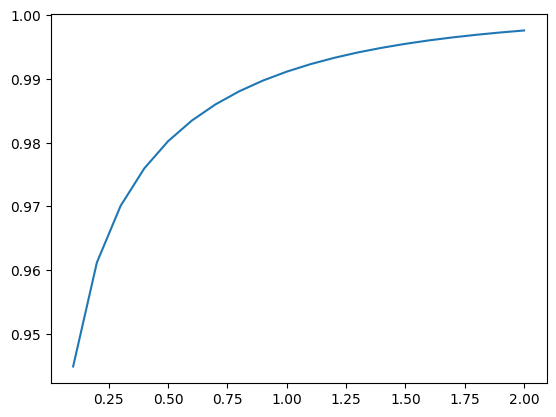

In [58]:
# Exercise 8.2
import numpy as np, matplotlib.pyplot as plt
from scipy.special import erfinv, erf

Iratio=1 #Iratio=IR/IF, TS=ts/taup for turn-off
TS=(erfinv(1/(1+Iratio)))**2
#print(f"TS={TS:.2f}")

X=np.arange(0,5,101) #X=x'/Lp, T=t/taup
T=np.linspace(0.1,2,20)
y0=np.exp(-X) #Plot steady-state curve

VON=0.5
vrel=[] #vrel=vA/VON
kT=0.0259

#vAVON=(kT/VON)*np.log(1+(1-np.exp(-T))/(np.exp(VON/kT)-1))
#print("T:", T,"vAVON:",vAVON)

for i in range(len(T)):
    A=np.exp(-X)*(1-erf(X/(2*np.sqrt(T[i]))-np.sqrt(T[i])))
    B=np.exp(X)*(1-erf(X/(2*np.sqrt(T[i]))+np.sqrt(T[i])))
    yon=(A-B)/2 #yon=Dpn(x',t)/Dpnmax during turn-on
    vj=(kT/VON)*np.log(1+yon[0]*(np.exp(VON/kT)-1)) #exact va/VON
    vrel.append(vj)  # Corrected list appending
    yoff=np.exp(-X)-(1+Iratio)*yon #yoff=Dpn(x',t)/Dpnmax during turn-off
print("T:", T, "vrel:", vrel)
plt.plot(T,vrel)
#plt.plot(T,vAVON)
plt.show()